# DIST DataSet Quick Start

In [1]:
import numpy as np

##  Load the DIST dataset

In [2]:
data = np.load('DIST_DataSet.npz', allow_pickle=True)

## Dataset Structure

The data architecture of the dataset is detailed as follows:

1. **`data_array`**:
   - The `data_array` serves as the foundational element of the dataset, encapsulating the sensor-generated data.
   - It adopts a bidimensional array structure, with each row distinctly representing a temporal sampling instance and each column corresponding to a specific sensor variable.
   - The dataset element `data_array[i, j]` holds the value recorded by the j-th sensor at the i-th chronological sampling point.
2. **`time_stamp_array`**:
   - This array contains the time stamps correlated with each data sampling instance in `data_array`.
   - The element `time_stamp_array[i]` aligns with and timestamps the sensor readings in the corresponding `data_array[i, :]`.
   - Reflecting a high-resolution data capture approach, the dataset maintains a consistent 20-second interval between each successive temporal sampling point, offering a detailed chronological progression of the distillation process.
3. **`vars_index_dict`**:
   - This dictionary provides a mapping schema, linking sensor variable names to their respective indices within `data_array`.
   - An entry in `vars_index_dict`, such as `'LIC02.PV': 3`, indicates that data pertaining to LIC02.PV is located in the third column of `data_array`.

In [3]:
data.files

['data_array', 'time_stamp_array', 'vars_index_dict']

In [4]:
data_array = data["data_array"]
data_array

array([[18.87245642, 12.07493062, 22.36568467, ..., 81.13844442,
         4.07567676, 63.42943012],
       [18.87245642, 12.07493062, 22.36568467, ..., 81.13844442,
         4.07567676, 63.42943012],
       [18.87245642, 12.07493062, 22.36568467, ..., 81.13844442,
         4.07567676, 63.42943012],
       ...,
       [20.36896387, 20.04042015, 24.01708181, ..., 87.42151215,
         3.76667025, 63.13107   ],
       [20.4959717 , 20.19342205, 23.81668524, ..., 87.63199725,
         3.80559266, 63.13107   ],
       [20.48144805, 20.23670841, 23.82924067, ..., 87.73687322,
         3.80719138, 63.29096179]])

In [5]:
time_stamp_array = data["time_stamp_array"]
time_stamp_array

array([1.68814081e+09, 1.68814083e+09, 1.68814085e+09, ...,
       1.69081915e+09, 1.69081917e+09, 1.69081919e+09])

In [6]:
vars_index_dict = data["vars_index_dict"].reshape(-1)[0]
vars_index_dict

{'FIC05.PV': 0,
 'FIC09.PV': 1,
 'FIC11.PV': 2,
 'LIC02.PV': 3,
 'LIC03.PV': 4,
 'LIC04.PV': 5,
 'LIC05.PV': 6,
 'LIC06.PV': 7,
 'LIC12.PV': 8,
 'FIC05.OP': 9,
 'FIC09.OP': 10,
 'FIC11.OP': 11,
 'LIC02.OP': 12,
 'LIC03.OP': 13,
 'LIC04.OP': 14,
 'LIC05.OP': 15,
 'LIC06.OP': 16,
 'LIC12.OP': 17,
 'FI12.PV': 18,
 'TI36.PV': 19,
 'TI38.PV': 20,
 'PI03.PV': 21,
 'FI01.PV': 22,
 'TI02.PV': 23,
 'TI03.PV': 24,
 'FI03.PV': 25,
 'PI01.PV': 26,
 'PI02.PV': 27,
 'TI05.PV': 28,
 'TI12.PV': 29,
 'PI06.PV': 30,
 'TI16.PV': 31,
 'PI05.PV': 32,
 'PI08.PV': 33,
 'TI25.PV': 34,
 'PI41.PV': 35,
 'TI21.PV': 36}

## Data visualization

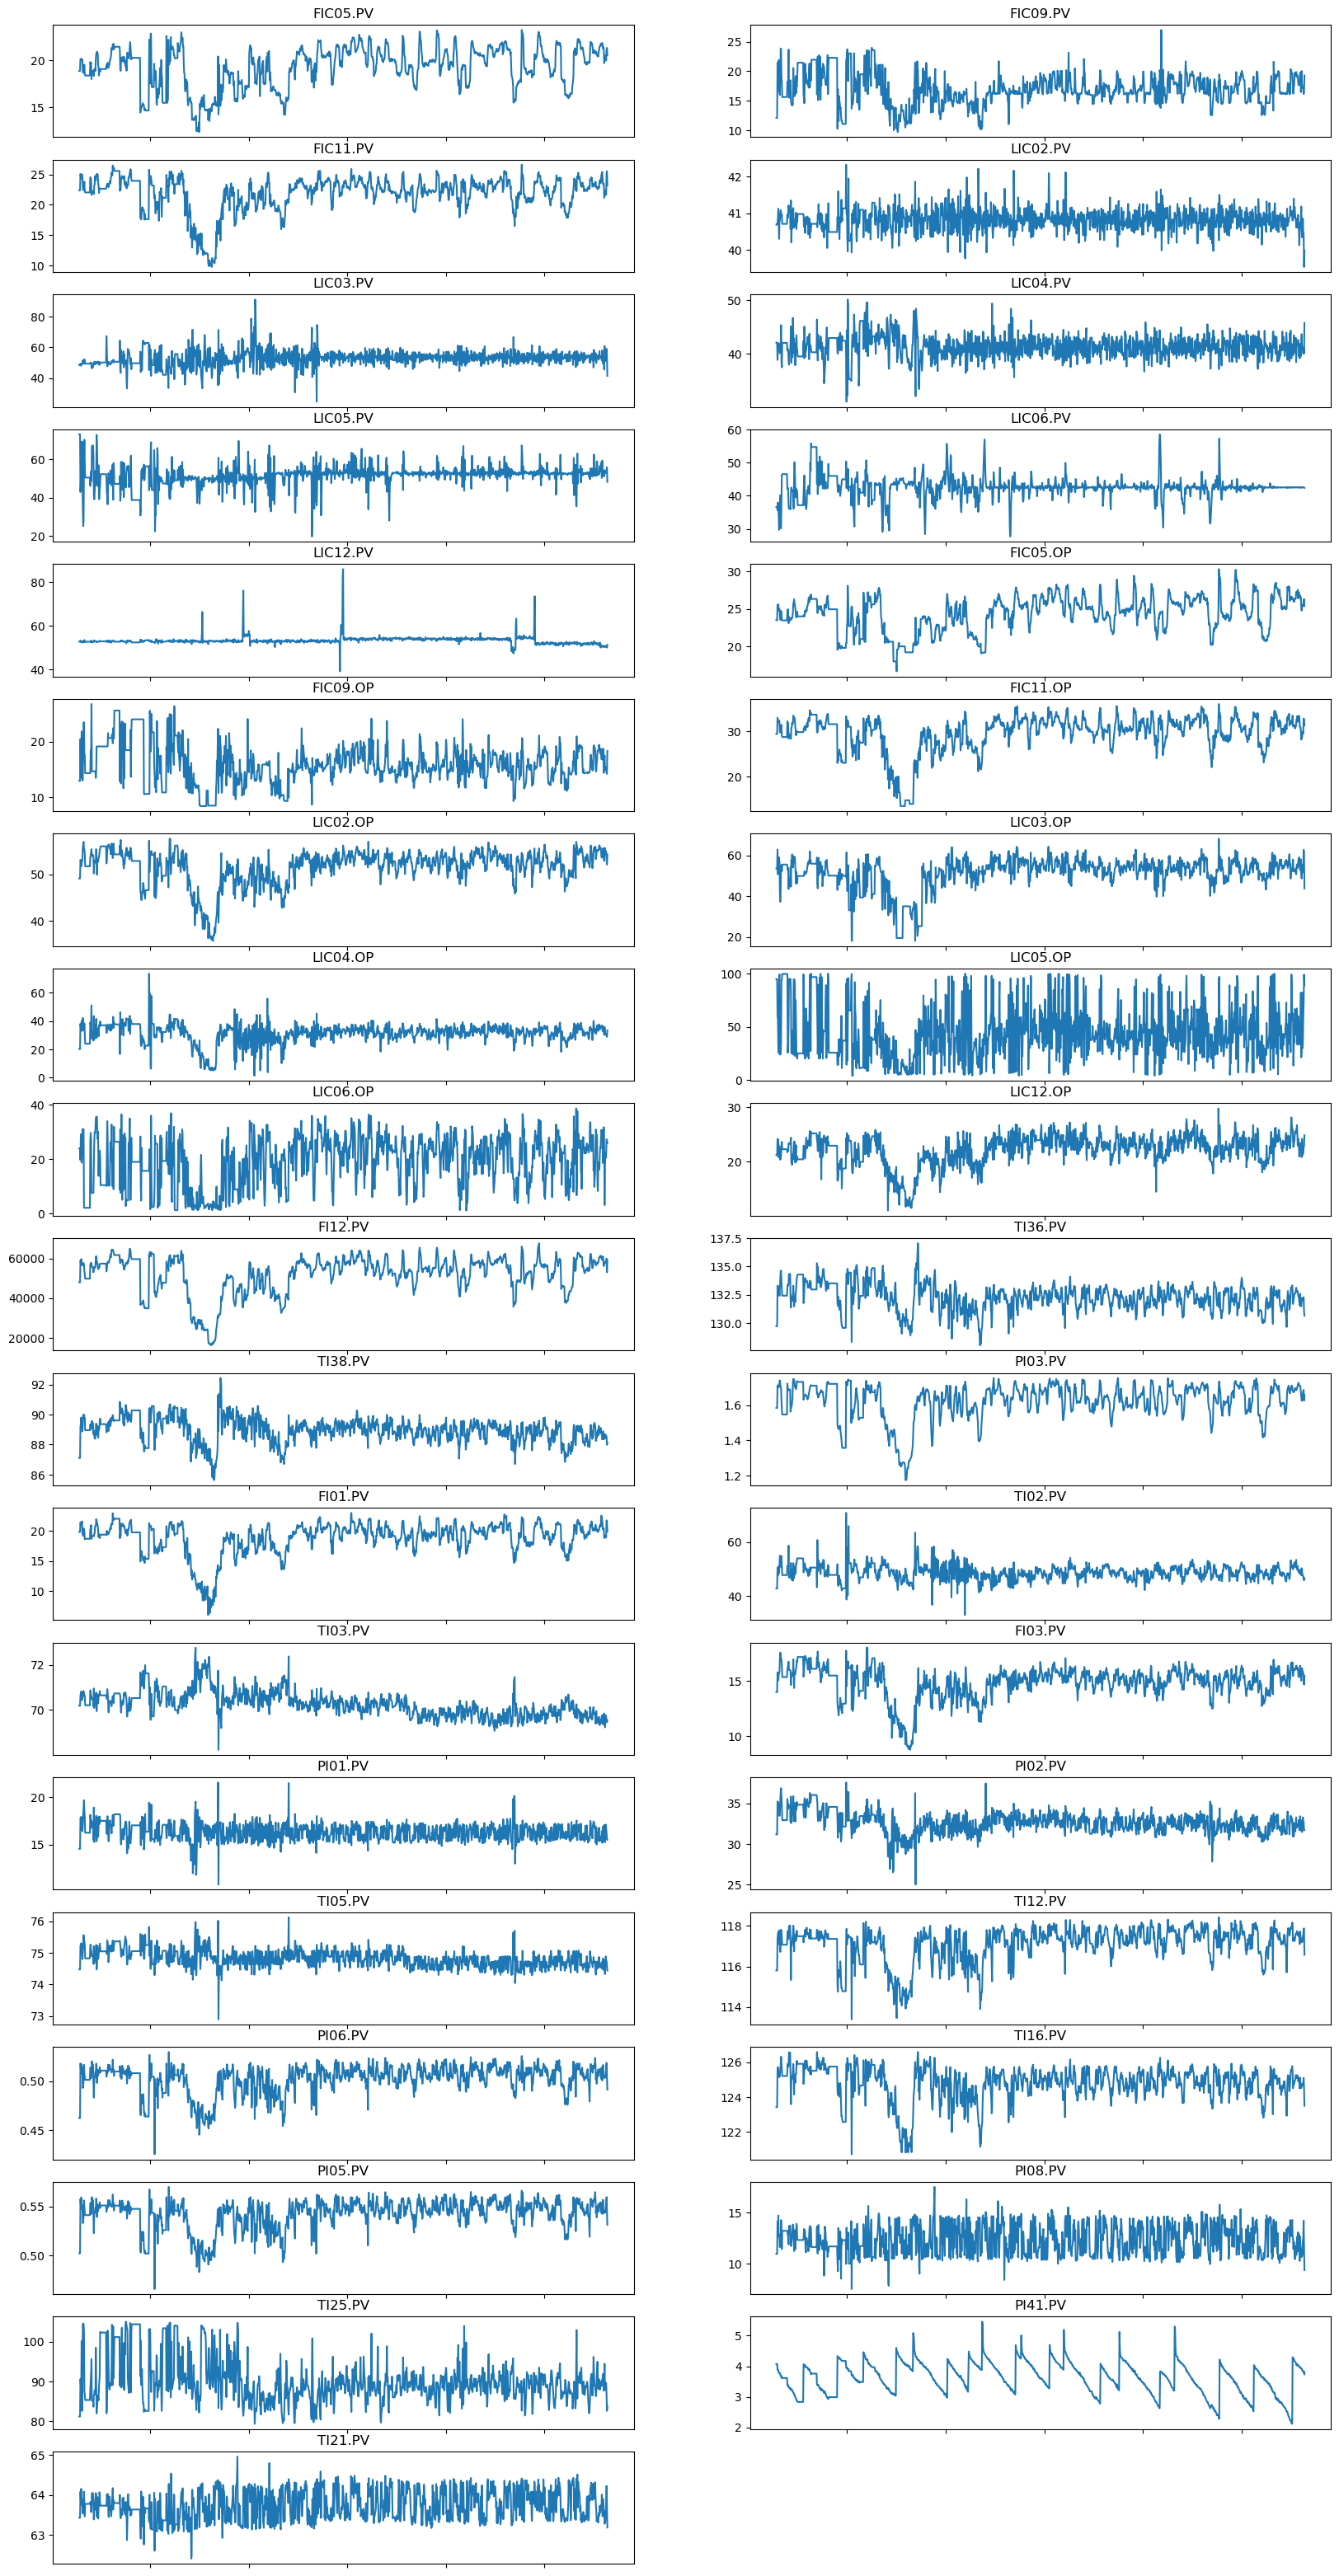

In [7]:
# Plot line graphs for each variable
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 40))
for i in range(data_array.shape[1]):
    ax = fig.add_subplot(data_array.shape[1]//2 + 1, 2, i+1)
    ax.plot(time_stamp_array[::100], data_array[::100, i])
    ax.set_xticklabels([])
    ax.set_title(list(vars_index_dict.keys())[i])

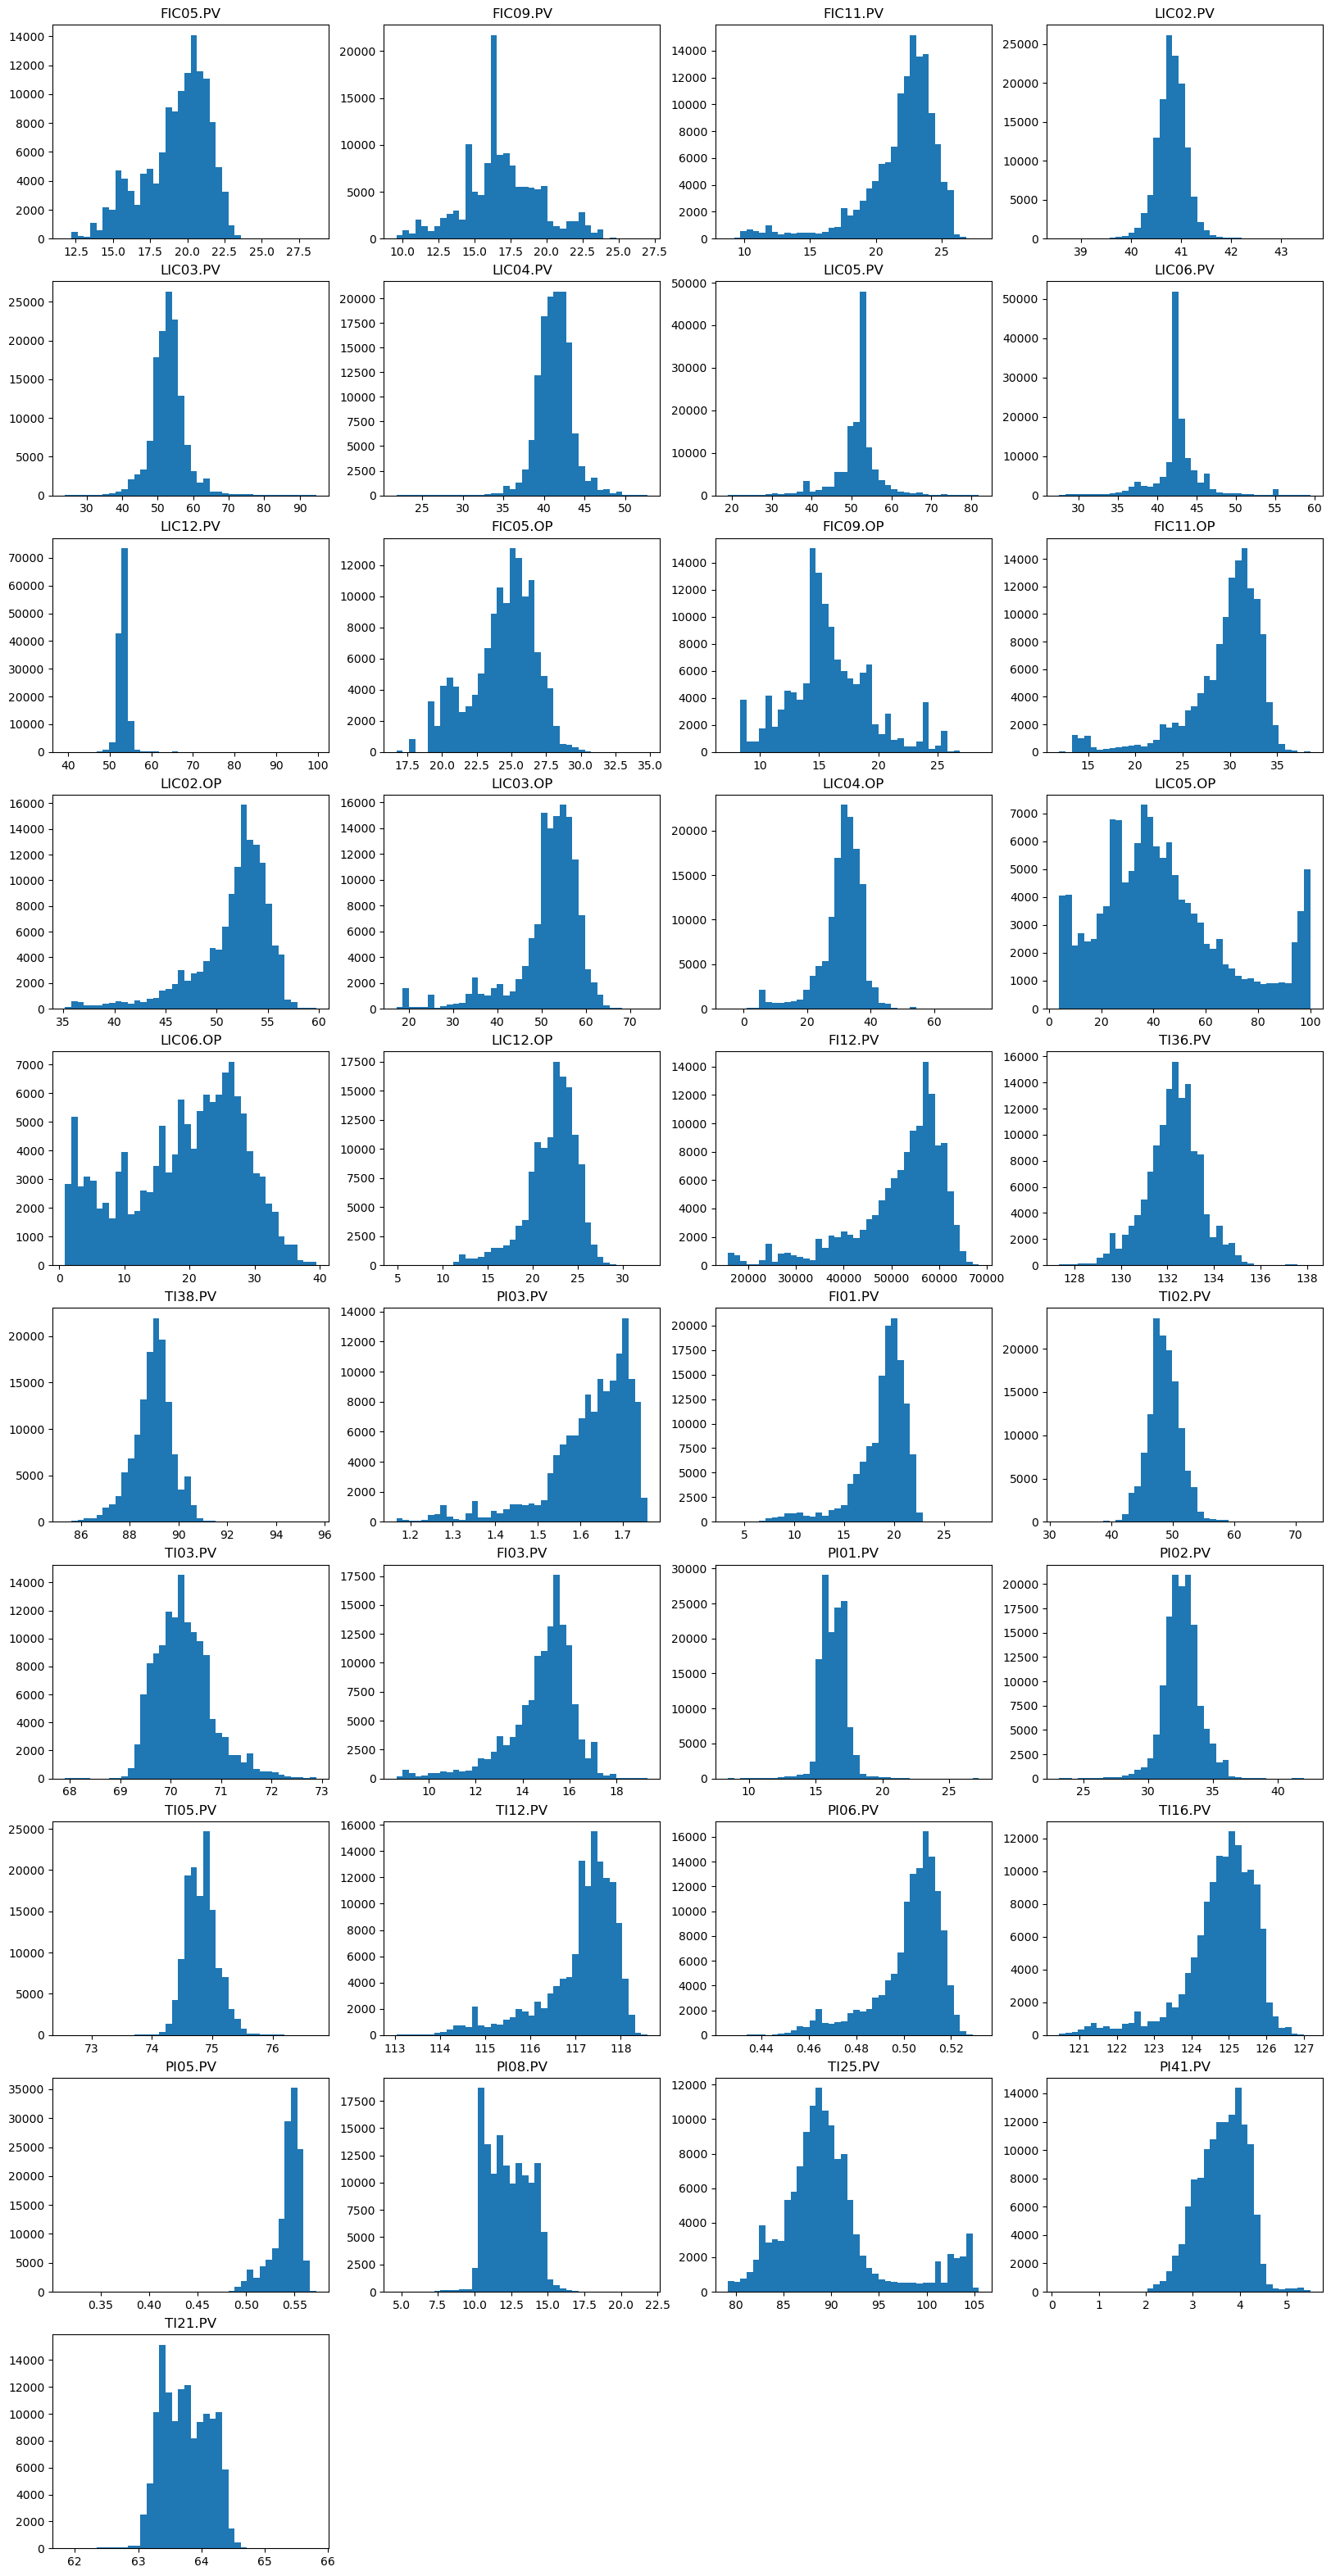

In [8]:
# Plot histograms for each variable
fig = plt.figure(figsize=(20, 40))
for i in range(data_array.shape[1]):
    ax = fig.add_subplot(data_array.shape[1]//4 + 1, 4, i+1)
    ax.hist(data_array[:, i], bins=40)
    ax.set_title(list(vars_index_dict.keys())[i])